# Lista de ejercicios y guía de trabajo:


## Exercici 1
Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 



## Exercici 2
Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.



## Exercici 3
Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

# Previo a los ejercicios. Carga de datos.

En un primer lugar, cargaremos el documento que contiene los datos de la UEFA. Usaremos la librería Pandas. Para importar correctamente este fichero, se tendrá que indicar el separador (por defecto es coma, en este fichero es ;) y añadir un encoding.

In [12]:
import pandas as pd

UEFA = pd.read_csv('UEFA.csv', sep=';',  encoding="ISO-8859-1") 

print(len(UEFA.index)) #Número de registros

UEFA.head() #Normalmente usaba [:5], para acostumbrarme también a usar head.

98


,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas


In [13]:
UEFA.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               98 non-null     int64  
 1   Squad            98 non-null     object 
 2   Country          98 non-null     object 
 3   LgRk             98 non-null     int64  
 4   MP               98 non-null     int64  
 5   W                98 non-null     int64  
 6   D                98 non-null     int64  
 7   L                98 non-null     int64  
 8   GF               98 non-null     int64  
 9   GA               98 non-null     int64  
 10  GD               98 non-null     int64  
 11  Pts              98 non-null     int64  
 12  Pts/G            98 non-null     float64
 13  xG               98 non-null     float64
 14  xGA              98 non-null     float64
 15  xGD              98 non-null     float64
 16  xGD/90           98 non-null     float64
 17  Last 5           9

In [14]:
UEFA.isna().sum() 

Rk                 0
Squad              0
Country            0
LgRk               0
MP                 0
W                  0
D                  0
L                  0
GF                 0
GA                 0
GD                 0
Pts                0
Pts/G              0
xG                 0
xGA                0
xGD                0
xGD/90             0
Last 5             0
Attendance         0
Top Team Scorer    0
Goalkeeper         0
dtype: int64

Hemos comprado que el fichero ha cargado correctamente. No hay ningún dato con NA, y los tipos de datos contenidos en las distintas columnas encajan con las variables que representan.

# Exercici 1

Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

Para resolver este primer ejercicio, se me indica que debo seleccionar tan solo **1 atributo** del conjunto de los datos (es decir, una sola variable). En la mayoría de los análisis sencillos que se pueden hacer (como veremos posteriormente) se seleccionan 2 variables (por ejemplo, una categórica y otra numérica) y se analizan potenciales diferencias.

Por tanto, para realizar este ejercicio decido plantear una pregunta muy sencilla: **La variable GF (Goles marcados) ¿sigue una distribución normal?**. Se plantean dos hipótesis:

- **Hipótesis nula - H0**: La variable GF sigue una distribución gaussiana (normal)
- **Hipótesis alternativa - H1:** La variable GF NO sigue una distribución gaussiana (normal)

Selecciono además este tipo de pregunta ya que muchos tests requieren la comprobación previa de la normalidad de las variables o residuos. 

Para resolverlo, realizo un test de shapiro:


In [30]:
from scipy.stats import shapiro 

shapiro(UEFA['GF'])

ShapiroResult(statistic=0.9432637691497803, pvalue=0.0003564691578503698)

El p.valor es menor a 0.05, lo que nos indica que debemos rechazar la hipótesis nula (es decir, los datos NO siguen una distribución normal). Antes de proseguir, decido graficar para ver cuál es la distribución real de los datos:

array([[<AxesSubplot:title={'center':'GF'}>]], dtype=object)

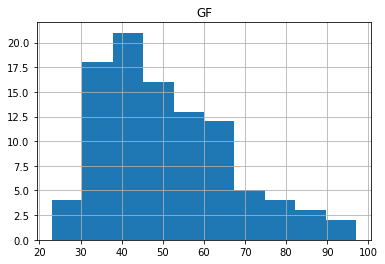

In [32]:
UEFA.hist(column='GF')

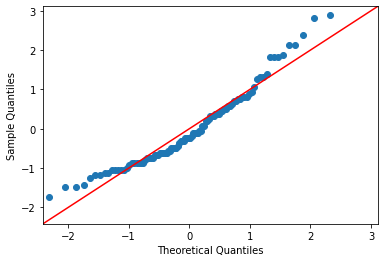

In [40]:
import statsmodels.api as sm

fig = sm.qqplot(UEFA['GF'], fit=True, line="45")

plt.show()

#Nota: si ponemos el parámetro line sin realizar un fit, queda un plot bastante terrible. Esto se debe a que la opción "45"
#funciona bien si tenemos datos normalizados con media=0 y sd=1 (no es el caso). Otras opciones es usar line= s por ejemplo
#(s= standarizado)

En el histograma podemos aprecial claramente que la variable GF no tiene forma de campana (los valores más frecuentes se sitúan en la parte baja de la distribución). El gráfico del QQplot nos permite reafirmar los resultados ya obtenidos y visualizados (una distribución normal debería seguir la diagonal)

# Exercici 2

Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

Resolveré este ejercicio dando dos ejemplos: en un primer ejemplo seleccionaré una variable categórica y otra numérica. En el segundo, dos variables numéricas

### Ejemplo 1: Variable categórica y variable numérica

Para comenzar, haré un primer sondeo acerca de alguna de las variables categóricas que podemos encontrar en el dataset. Esto me permitirá tener una mejor idea de las bases de datos:

In [15]:
print(UEFA['Country'].value_counts())

ENG    20
ESP    20
FRA    20
ITA    20
GER    18
Name: Country, dtype: int64


Para empezar de manera sencilla, me plantearé elegir una variable categórica (en mi caso, selecciono los países) y testear si hay diferencias significativas en cuando al ranking en la UEFA (variable numérica).

Así pues, la pregunta planteada es: **En la UEFA, ¿tienen resultados similares los equipos de los distintos países?**. La **hipótesis nula (H0)** es que NO hay diferencias en cuanto al ranking general. La **hipótesis alternativa (H1)** es que SI existen diferencias en cuanto al ranking (por ejemplo, los equipos ingleses tienden a posicionarse en mejores posiciones que los equipos de los otros países - es decir, el país de procedencia de los equipos SI tiene un efecto significativo en su ranking)

Empecemos echando un vistazo a los datos:

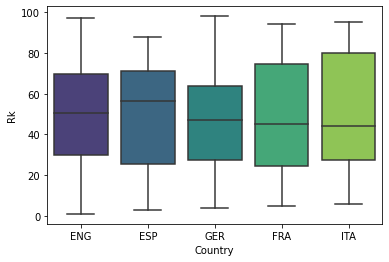

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

a=sns.boxplot(x='Country', y='Rk', data=UEFA, palette="viridis")

Observamos en el boxplot que las distribuciones parecen similares en todos los grupos. Las medianas (no las medias) parecen más bajas en los casos de Francia e Italia, pero será necesario un test para comprobar si las diferencias son o no significativas

Como no tenemos muchos grupos, antes de realizar el ANOVA comprobaré si se cumple la premisa de normalidad dentro de cada grupo (distribución de Y siguiendo una normal dentro de cada categoría).

En el caso de las distribuciones continuas o ante la presencia de muchos grupos, la mejor estrategia será checkear los residuos de manera global. 

En este primer test de hecho ya estaré obteniendo un p.valor 

In [28]:
from scipy.stats import shapiro 

print(shapiro(UEFA[UEFA['Country'] == 'ENG']['Rk']))
print(shapiro(UEFA[UEFA['Country'] == 'ESP']['Rk']))
print(shapiro(UEFA[UEFA['Country'] == 'GER']['Rk']))
print(shapiro(UEFA[UEFA['Country'] == 'FRA']['Rk']))
print(shapiro(UEFA[UEFA['Country'] == 'ITA']['Rk']))


ShapiroResult(statistic=0.9604693651199341, pvalue=0.5532688498497009)
ShapiroResult(statistic=0.9297448992729187, pvalue=0.152680441737175)
ShapiroResult(statistic=0.9728591442108154, pvalue=0.8494011759757996)
ShapiroResult(statistic=0.9320498108863831, pvalue=0.1690875142812729)
ShapiroResult(statistic=0.9116873741149902, pvalue=0.06863816827535629)


Todos los p-valores obtenidos son mayores a 0.05, así que los datos siguen una distribución normal dentro de cada uno de los grupos. Esto nos permite compararlos llevando a cabo un test paramétrico, que bajo la premisa de normalidad debería ser robusto.

In [60]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


model = ols('Rk ~ C(Country)', data=UEFA).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
C(Country),76.672222,4.0,0.022753,0.998975
Residual,78347.827778,93.0,NaN,NaN


Realizamos una ANOVA y observamos que el p.valor es MAYOR a 0.05, lo cual significa que **no** hay diferencias significativas entre los rankings de los países. 

Aunque no sería necesario proseguir, en caso de que hubiera salido un resultado significativo sería necesario realizar un test posthoc (por ejemplo un tukey) para determinar exactamente qué grupos resultan distintos entre sí:

In [64]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=UEFA['Rk'],
                          groups=UEFA['Country'],
                          alpha=0.05)

print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   ENG    ESP     1.05    1.0 -24.4848 26.5848  False
   ENG    FRA    -0.05    1.0 -25.5848 25.4848  False
   ENG    GER  -1.5111 0.9998 -27.7456 24.7234  False
   ENG    ITA     0.85    1.0 -24.6848 26.3848  False
   ESP    FRA     -1.1    1.0 -26.6348 24.4348  False
   ESP    GER  -2.5611 0.9988 -28.7956 23.6734  False
   ESP    ITA     -0.2    1.0 -25.7348 25.3348  False
   FRA    GER  -1.4611 0.9999 -27.6956 24.7734  False
   FRA    ITA      0.9    1.0 -24.6348 26.4348  False
   GER    ITA   2.3611 0.9991 -23.8734 28.5956  False
-----------------------------------------------------


A continuación, analizaré la relación que existe entre dos variables numéricas. Como el siguiente ejercicio he visto que se focaliza en entrenar sklearn y train tests, he decidido buscar otras librerías para explorar más recursos. 

En un primer lugar, graficaré las variables:

<AxesSubplot:xlabel='Rk', ylabel='GF'>

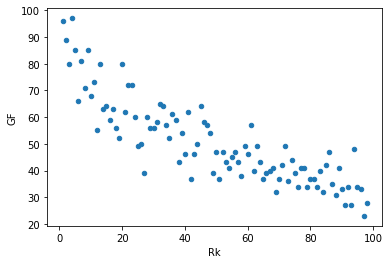

In [66]:
UEFA.plot.scatter(x='Rk', y='GF')

In [72]:
UEFA.corr()['Rk']['GF']

-0.8552095484329806

Observo una aparente correlación negativa entre los Goles marcados y el ranking (más goles marcados = posición más alta en el ranking, que equivale a un número inferior). Así mismo, cuando calculo la correlación utilizando el método por defecto (Pearson), veo que es elevada y negativa (-0.85).

No obstante, si queremos ir más allá, lo que podemos hacer es ajustar un **modelo de regresión** entre ambas variables. Este modelo irá además asociado a un p.valor. Un p.valor bajo implicará que la variable predictora está relacionada significativamente con la variable respuesta (implica "causalidad"). Nótese que en el caso de la correlación NO teníamos este componente causal, sino tan solo la evidencia de que ambas variables muestran covariación. 

Además, con la regresión obtendremos una fórmula (modelo) que podremos utilizar para **predecir**.


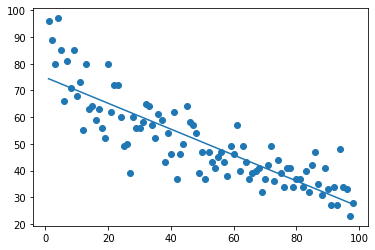

3.75289891780855e-29


In [73]:
from scipy import stats

x = UEFA['Rk']
y = UEFA['GF']
slope, intercept, r, p, std_err = stats.linregress(x, y)


def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()
print(p)

# Exercici 3

Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

A nivel general, tengo la impresión que dentro de esta base de datos puede haber múltiples variables cuya variación está relacionada entre ellas. Creo que el hecho de que las variables predictoras no sean independientes entre si puede afectar a la robustez del modelo.

Así mismo, veo muy pocas variables categóricas potencialmente comparables (tan solo el país), por lo que plantear un ANOVA de dos factores me parece complicado.

Finalmente, decido empezar con una exploración general para ver qué variables no tienen una elevado nivel de correlación entre ellas, de cara a su introducción en el modelo:

In [76]:
UEFA.corr()

,Rk,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance
Rk,1.000000,0.988130,0.048452,-0.966555,0.301579,0.924273,-0.855210,0.837186,-0.950350,-0.975809,-0.982258,-0.817633,0.789226,-0.896688,-0.895620,-0.542683
LgRk,0.988130,1.000000,0.077611,-0.952942,0.310066,0.910752,-0.843291,0.826181,-0.937446,-0.959944,-0.968642,-0.795941,0.779205,-0.878232,-0.876824,-0.532435
MP,0.048452,0.077611,1.000000,0.016391,0.251907,0.063785,-0.083514,-0.049424,-0.025317,0.061955,-0.036399,-0.065936,-0.039456,-0.021589,-0.022025,0.032255
W,-0.966555,-0.952942,0.016391,1.000000,-0.438612,-0.869553,0.880804,-0.795596,0.944505,0.986890,0.986395,0.851354,-0.753535,0.900125,0.898715,0.583984
D,0.301579,0.310066,0.251907,-0.438612,1.000000,-0.017991,-0.364518,0.070288,-0.257648,-0.288033,-0.315227,-0.325834,0.072106,-0.238222,-0.241650,-0.243187
L,0.924273,0.910752,0.063785,-0.869553,-0.017991,1.000000,-0.800298,0.841547,-0.919229,-0.929928,-0.936085,-0.785229,0.795575,-0.879614,-0.876187,-0.510045
GF,-0.855210,-0.843291,-0.083514,0.880804,-0.364518,-0.800298,1.000000,-0.585596,0.908890,0.873521,0.886530,0.919444,-0.600808,0.867793,0.871334,0.483135
GA,0.837186,0.826181,-0.049424,-0.795596,0.070288,0.841547,-0.585596,1.000000,-0.870293,-0.835098,-0.828477,-0.592486,0.861637,-0.791906,-0.787094,-0.376617
GD,-0.950350,-0.937446,-0.025317,0.944505,-0.257648,-0.919229,0.908890,-0.870293,1.000000,0.960402,0.964901,0.863488,-0.808352,0.934701,0.934376,0.487320
Pts,-0.975809,-0.959944,0.061955,0.986890,-0.288033,-0.929928,0.873521,-0.835098,0.960402,1.000000,0.994677,0.848167,-0.790710,0.916410,0.914305,0.579261


0.48313482594872875

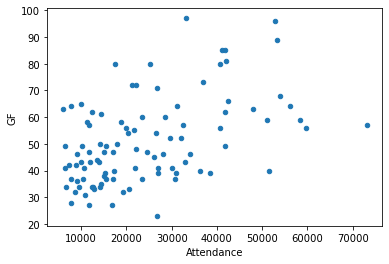

In [84]:
UEFA.plot.scatter(x='Attendance', y='GF')
UEFA.corr()['Attendance']['GF'] #Correlación no muy alta

<AxesSubplot:xlabel='GA', ylabel='GF'>

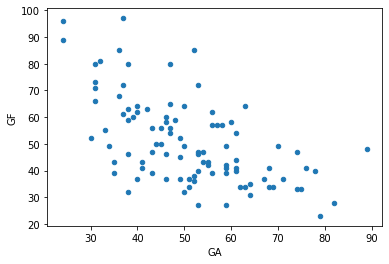

In [78]:
UEFA.plot.scatter(x='GA', y='GF')

Tras esta exploración inicial, decido ajustar un modelo lineal con las variables "Attendance" y "GF" como variables independientes, y la variable "Ranking" como variable dependiente. Realmente es lo mismo que la regresión anterior, pero con dos variables explicativas en lugar de una

In [81]:
from sklearn import linear_model
import statsmodels.api as sm

x = UEFA[['GF','Attendance']]
y = UEFA['Rk']
 
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

#Para printear el sumario del modelo, usaré stats models, pero los resultados deberían equivaler!!

x = sm.add_constant(x) #se añade constante al modelo
 
model = sm.OLS(y, x).fit() #se ajusta el modelo
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 126.82617733608733
Coefficients: 
 [-1.36598728e+00 -3.22942893e-04]
                            OLS Regression Results                            
Dep. Variable:                     Rk   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     145.0
Date:                Sun, 23 Oct 2022   Prob (F-statistic):           1.35e-29
Time:                        17:36:01   Log-Likelihood:                -398.05
No. Observations:                  98   AIC:                             802.1
Df Residuals:                      95   BIC:                             809.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

Observamos que los resultados son consistentes con ambas metodologías (los coeficientes son los mismos). Podemos ver también que el p.valor de las variables independientes (GF y Attendance) es significativo (es decir, ambas son explicativas). La R ajustada es bastante alta (0.748)

Otro factor a destacar es el aviso sobre una posible "multicolinearidad" - es decir, que las variables predictoras estén correlacionadas entre sí. Esto es algo que ya me esperaba de base, pero teniendo en cuenta que el resto de variables también muestran correlaciones altas entre ellas, no creo que se pueda mejorar mucho (he leído que ajustar los valores de la variable x puede ayudar en los casos de las regresiones de una variable...)